## 1. Core Library

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV,KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


## 2. Data exploratory analysis and visualisations

### Data 

In [13]:
colon = pd.read_csv('colonCancerData.csv', index_col=0)
colon_label = pd.read_csv('label.csv')

In [14]:
colon.shape

(62, 2000)

In [15]:
colon

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.6762,...,99.110714,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.2524,...,126.789290,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.5821,...,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.4071,...,152.595240,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.4131,...,126.464290,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,4972.1662,4173.9182,3668.5338,1567.5554,1570.4405,3466.8107,2106.4987,1535.7575,1887.6212,3519.6000,...,70.667857,6.44750,156.44500,93.95000,86.90875,95.442857,31.18750,57.15250,13.96000,10.54750
58,9112.3725,6824.4864,5982.8463,3147.0429,4847.3083,11222.6820,6333.4725,4299.5025,4644.4425,5888.5464,...,129.404760,35.87875,342.65000,84.75125,60.27375,143.877380,8.99625,106.87875,23.20250,32.16625
59,6730.6250,3472.1250,2559.4625,2624.6893,1596.2179,4372.7893,3798.5262,1026.4775,3512.3338,3243.1690,...,254.865480,119.96250,111.60375,166.75500,130.45500,124.253570,96.46500,133.52125,93.09875,7.43250
60,6234.6225,4005.3000,3093.6750,3183.0857,1795.3107,3940.8464,2019.8500,1406.6500,2927.7938,2177.3202,...,190.711900,85.25875,206.53625,80.44875,104.80500,180.941670,68.93375,118.20125,32.68750,23.26500


In [7]:
colon_label

,label
0,-1
1,1
2,-2
3,2
4,-3
...,...
57,-38
58,-39
59,39
60,-40


In [16]:
def ConvertLabels(labels):
    #labels = np.asarray(labels)
    #for label in range(len(labels))
     #   print(label)
    column_name = 'label'
    labels.loc[colon_label[column_name] > 0] = 1
    labels.loc[colon_label[column_name] < 0] = 0
    
    return labels


In [17]:
colon_label = ConvertLabels(colon_label)
data_label = pd.concat([colon, colon_label], axis = 1, sort= False)

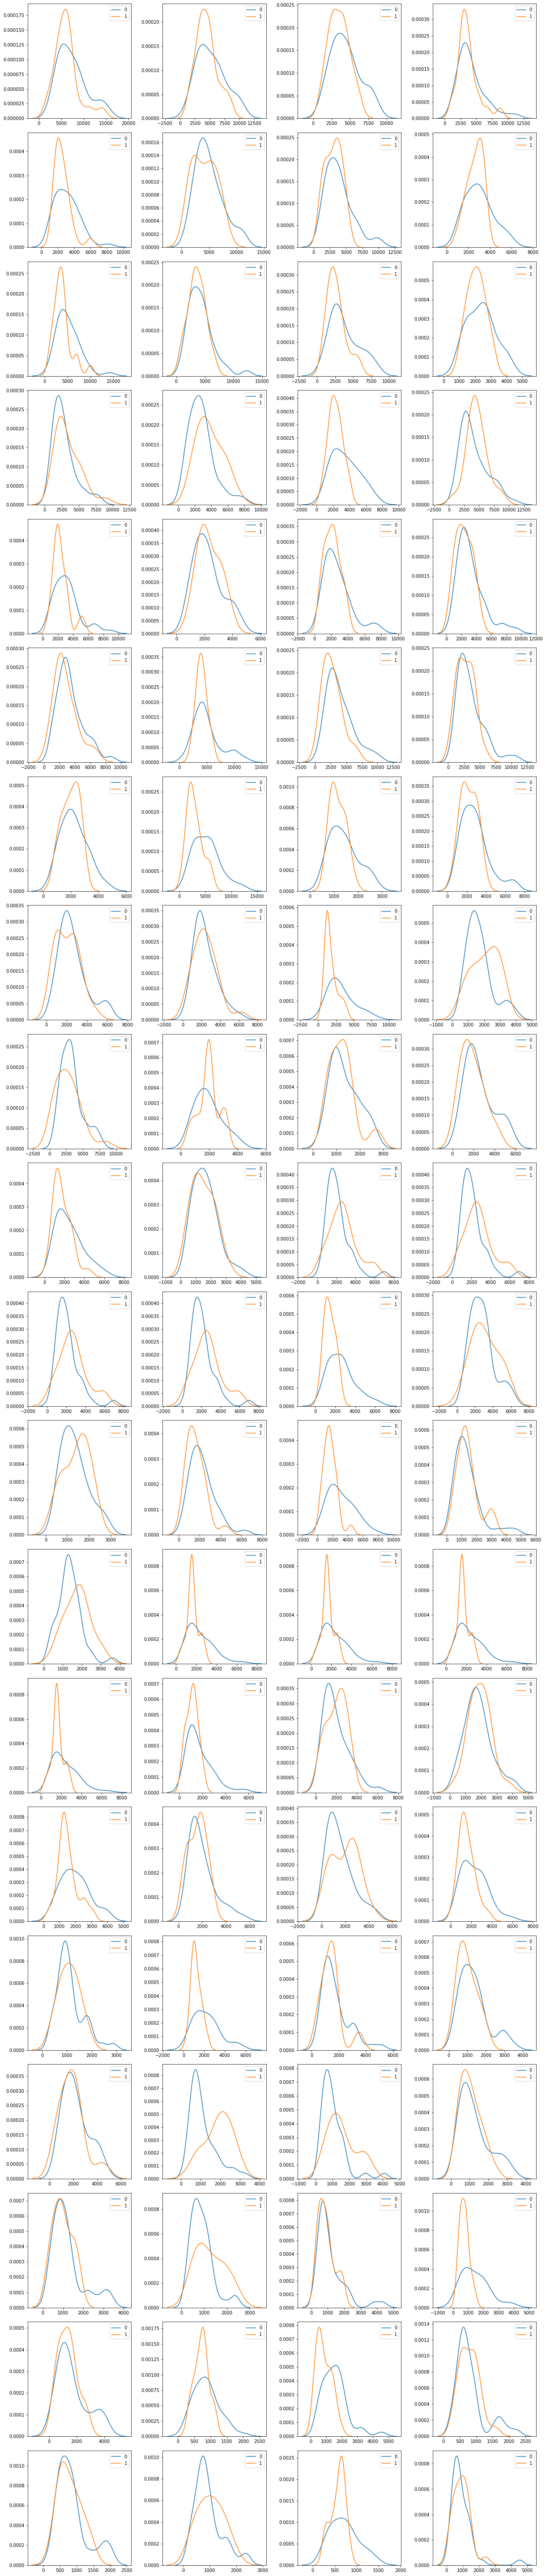

In [10]:
fig, ax = plt.subplots(20,4, figsize=(17,80))
feature_number = [str(i) for i in range(80)]
labels_number = [0, 1]
jj = -1
for ii, feature in enumerate(feature_number):
    if ii % 4 == 0:
        jj += 1
    for label in labels_number:
        sns.kdeplot(data_label[data_label['label']==label][feature].values.reshape(-1,), \
                    ax=ax[jj][ii % 4], label=label)

#[ax[ii].set_title("Feature {}".format(feature)) for ii, feature in enumerate(feature_number)] # Set band titles
#ax[0].legend(loc='upper center', bbox_to_anchor=(1.6, 1.25),
#          ncol=6) # Put legend outside plot
#[ax[ii].legend_.remove() for ii in np.arange(1,4)] # Remove all legends except the first one
fig.tight_layout()
plt.show()

In [18]:
scaler = StandardScaler()
colon_scale = scaler.fit_transform(colon)

In [19]:
colon_scale

array([[ 0.51292947,  0.23088092,  0.09353633, ..., -0.4496318 ,
         0.79345174, -0.50646013],
       [ 0.70029951,  0.80720184,  0.43736197, ...,  0.82059737,
        -0.23010262, -0.92994296],
       [-1.03981707,  0.92273048,  0.70714741, ..., -0.82788552,
        -0.97398155, -0.98737188],
       ...,
       [-0.09294935, -0.688494  , -0.85133634, ...,  0.21296012,
         1.04445846, -1.26160164],
       [-0.25462291, -0.44292323, -0.55510448, ...,  0.0374717 ,
        -0.53900372, -0.69947279],
       [ 0.1487074 , -0.60475601, -0.75775893, ..., -0.43201996,
        -0.08882328, -0.11839329]])

In [20]:
corr = np.corrcoef(colon_scale, rowvar = False)
num = np.sum(corr > 0.6) - 2000
perc = num / (2000 * 2000 - 2000)
perc

0.20984942471235618

In [21]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y.label.values == target, 0], X_2d[y.label.values == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)


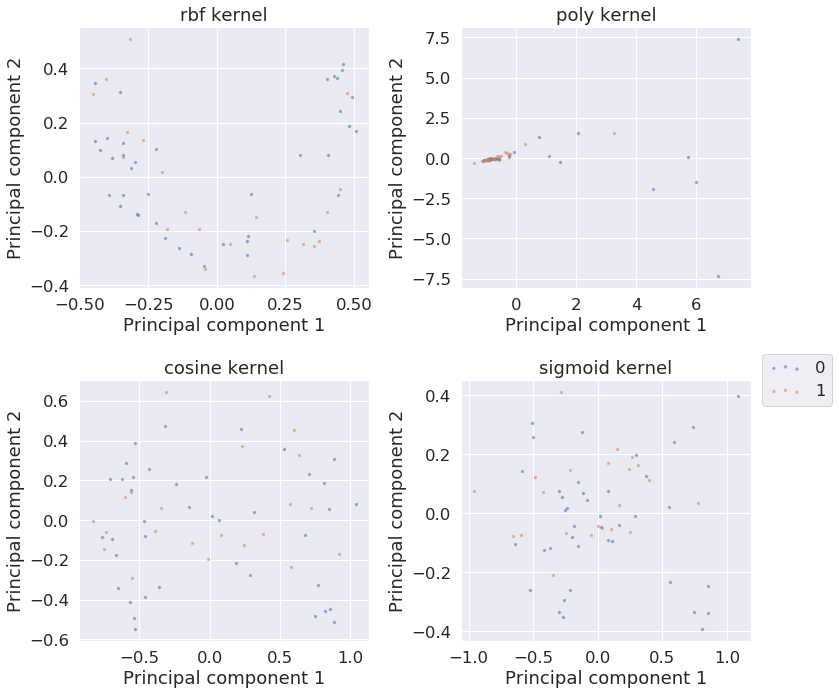

In [22]:
#PCA transform 2000 dimension to 2 dimension and plot
kernels = ['rbf', 'poly', 'cosine', 'sigmoid']

sns.set(font_scale=1.5)
fig, ax = plt.subplots(2,2,figsize=(12,10))
for ii, kernel in enumerate(kernels):
    X_kpca_2d = KernelPCA(n_components=2, kernel=kernel).fit_transform(colon_scale)
    plt.subplot(2,2,ii+1)
    scatter_2d_label(X_kpca_2d, colon_label)
    plt.title('{} kernel'.format(kernel))
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3)
fig.tight_layout()
plt.show()

In [23]:
from sklearn.model_selection import train_test_split, cross_validate

In [71]:
kernelpca = PCA(n_components=62)
X_pca_62d = kernelpca.fit_transform(colon_scale)
colon_label = np.c_[colon_label].reshape(-1,)

In [72]:
np.corrcoef(X_pca_62d)

array([[ 1.        ,  0.22328742,  0.50073975, ..., -0.05906336,
         0.1894823 , -0.07750062],
       [ 0.22328742,  1.        , -0.06084919, ...,  0.39997722,
        -0.26790055, -0.05811696],
       [ 0.50073975, -0.06084919,  1.        , ..., -0.03251878,
         0.39321196,  0.05308619],
       ...,
       [-0.05906336,  0.39997722, -0.03251878, ...,  1.        ,
         0.03088632,  0.23503302],
       [ 0.1894823 , -0.26790055,  0.39321196, ...,  0.03088632,
         1.        ,  0.29021575],
       [-0.07750062, -0.05811696,  0.05308619, ...,  0.23503302,
         0.29021575,  1.        ]])

Here is the cumulative explained variance ratio for different number of PCs.

In [82]:
np.cumsum(kernelpca.explained_variance_ratio_)

array([0.44955648, 0.54801902, 0.61566943, 0.67222138, 0.70505585,
       0.736347  , 0.75966579, 0.7818428 , 0.79851387, 0.81403902,
       0.82787177, 0.83993946, 0.85035145, 0.8600838 , 0.86854132,
       0.87640445, 0.88414674, 0.89081004, 0.89712368, 0.90300485,
       0.90852608, 0.91377366, 0.91874948, 0.92356079, 0.92812303,
       0.93226267, 0.93633708, 0.94017141, 0.94367086, 0.94699633,
       0.95017446, 0.95319452, 0.95611859, 0.95900835, 0.9617109 ,
       0.96424176, 0.96669363, 0.96903059, 0.9712017 , 0.97331889,
       0.97530488, 0.97723884, 0.97907849, 0.98086708, 0.98261222,
       0.98427997, 0.98587281, 0.98741106, 0.98879838, 0.99014444,
       0.99142942, 0.99265798, 0.9937625 , 0.99482734, 0.99580377,
       0.99672401, 0.99754792, 0.99834631, 0.99899087, 0.99957563,
       1.        , 1.        ])

Split the data into training data and test data.

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_62d, colon_label,
                                                   test_size=0.2, random_state=1234)

In [113]:
X_test.shape

(13, 62)

In [124]:
random_state = 1234
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net (Multi-layer perceptron)",
         "Naive Bayes", "LDA", "QDA"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state, max_iter=1000),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
for name, clf in zip(names, classifiers):
    cv = KFold(61, True, random_state=123)
    cv_results = cross_validate(clf, colon_scale, colon_label, cv=cv)
    clf.fit(X_train, y_train)
    #ca_score[name] = clf.score(X_test, y_test)
    ca_score[name] = np.mean(cv_results['test_score'])
    ce_score[name] = log_loss(y_test, clf.predict_proba(X_test))
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}".format(clf, ca_score[clf], ce_score[clf]))

/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("

Classification performance on validation set:
Logistic Regression, accuracy: 0.803, log-loss: 1.005
Nearest Neighbors, accuracy: 0.738, log-loss: 0.412
Linear SVM, accuracy: 0.803, log-loss: 0.479
RBF SVM, accuracy: 0.787, log-loss: 0.476
Decision Tree, accuracy: 0.836, log-loss: 13.284
Random Forest, accuracy: 0.803, log-loss: 0.528
Neural Net (Multi-layer perceptron), accuracy: 0.754, log-loss: 1.039
Naive Bayes, accuracy: 0.557, log-loss: 2.243
LDA, accuracy: 0.770, log-loss: 5.427
QDA, accuracy: 0.639, log-loss: 10.627


/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/home/s1925253/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("

Here we choose four reliable classifiers to compare the performance of choosing 10 PCs. 

In [88]:
random_state = 1234
names = ["Nearest Neighbors", "Linear SVM",
         "Decision Tree", "Random Forest"]
classifiers = [
    KNeighborsClassifier(n_neighbors=9),
    SVC(kernel="linear", probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
for name, clf in zip(names, classifiers):
    cv = KFold(62, True)
    cv_results = cross_validate(clf, X_pca_62d[:,0:10], colon_label, cv=cv)
    clf.fit(X_train, y_train)
    #ca_score[name] = clf.score(X_test, y_test)
    ca_score[name] = np.mean(cv_results['test_score'])
    ce_score[name] = log_loss(y_test, clf.predict_proba(X_test))
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}".format(clf, ca_score[clf], ce_score[clf]))

Classification performance on validation set:
Nearest Neighbors, accuracy: 0.839, log-loss: 0.412
Linear SVM, accuracy: 0.871, log-loss: 0.479
Decision Tree, accuracy: 0.629, log-loss: 10.627
Random Forest, accuracy: 0.774, log-loss: 0.528


Here using only *Linear SVM* to compare the accuracy of choosing different number of PC components. Set the parameter C equal to 0.01 and gamma equal to 0.001.

In [114]:
random_state = 1234
names = ['Linear SVM']
classifiers = [
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.01, gamma=0.001),
]

ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
cv_results = {}

#set n_splits equal to the number of training samples
cv = KFold(n_splits=49, True)
for i in range(49):
    for name, clf in zip(names, classifiers):
        #Store corss validate results of using different number of PC components
        #X_train and y_train is can be found before
        cv_results[i] = cross_validate(clf, X_train[:,0:i+1], y_train, cv=cv)
        
        #choosing 'test_score' in cv results and average the test score, test 
        #score means accuracy of choosing different fold. Because only 
        #exit one test data, the accuracy is either 1 or 0.
        ca_score[i] = np.mean(cv_results[i]['test_score'])

Here is the cross validation results:

In [119]:
cv_results[0]

{'fit_time': array([0.00137043, 0.00162196, 0.00162578, 0.00154066, 0.00149941,
        0.00149989, 0.00170112, 0.00165391, 0.00167465, 0.00109625,
        0.00103045, 0.00082755, 0.00079942, 0.00079179, 0.00079679,
        0.00080109, 0.00080371, 0.00083756, 0.00111985, 0.0010314 ,
        0.00104427, 0.00090623, 0.00093722, 0.00079799, 0.00080585,
        0.00083804, 0.00080752, 0.00080371, 0.00097537, 0.00096893,
        0.00098896, 0.00092268, 0.00086308, 0.00078511, 0.00077701,
        0.00079799, 0.00078917, 0.00079203, 0.00083876, 0.00076938,
        0.00096703, 0.00110531, 0.00097132, 0.00091481, 0.00082326,
        0.00081873, 0.00084758, 0.00082898, 0.00083447]),
 'score_time': array([0.00036311, 0.00049615, 0.00050187, 0.00049329, 0.0004518 ,
        0.00050569, 0.00048184, 0.00054884, 0.00049067, 0.00039339,
        0.00030851, 0.00026703, 0.00026178, 0.00026464, 0.00026298,
        0.00026178, 0.00028682, 0.00029469, 0.00045443, 0.00032711,
        0.00036693, 0.00027418, 

Here is the line plot of 49 average test score of different number of PC components

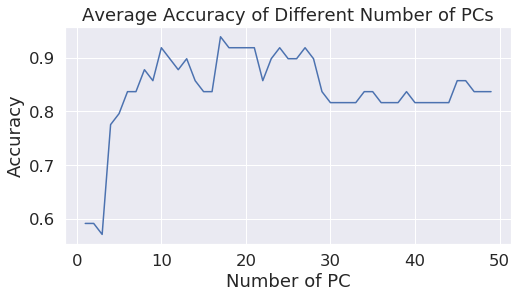

In [123]:
fig, ax = plt.subplots(1, 1, figsize = (8, 4))
plt.subplot(111)

sns.lineplot(x = list(range(1, 50)), y = list(ca_score.values()))
plt.xlabel('Number of PC')
plt.ylabel('Accuracy')
plt.title('Average Accuracy of Different Number of PCs')
plt.show()

Here using `gridsearchcv` function to choose the best `C` and `gamma` for SVM

In [46]:
cv = KFold(5, shuffle=True, random_state=1234)
clf = SVC(kernel='rbf')
parameters = {'C': np.logspace(-3,3,7), 'gamma': np.logspace(-4, 1, 6)}
svc_clf = GridSearchCV(
        estimator=clf,
        cv=cv,
        param_grid=parameters,
        scoring='accuracy'
        ).fit(X_pca_61d, colon_label)
cv_results = cross_validate(svc_clf, X_pca_61d, colon_label, cv=cv)
np.mean(cv_results['test_score'])

0.7730769230769231